## - NHANES Data: [NHANES 2021-2023](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2021-2023)
- **Marital Status** (`DMDMARTZ`) - categorical, needs recoding (married or not married). - ***DEMO_L.xpt***
- **Education Level** (`DMDEDUC2`) - categorical, needs recoding (bachelor’s or higher vs. less than bachelor’s). - ***DEMO_L.xpt***
- **Age in Years** (`RIDAGEYR`) - continuous.- ***DEMO_L.xpt***
- **Systolic Blood Pressure** (`BPXOSY3`) - continuous. - ***BPXO_L_Doc.xpt***
- **Diastolic Blood Pressure** (`BPXODI3`) - continuous. - ***BPXO_L_Doc.xpt***
- **Vitamin D Lab Interpretation** (`LBDVD2LC`) - categorical, two levels.- ***VID_L.xpt***
- **Hepatitis B Lab Antibodies** (`LBXHBS`) - categorical, needs recoding to two levels.- ***HEPB_S_L.xpt***
- **Weak/Failing Kidneys** (`KIQ022`) - categorical, can be treated as two levels. - ***KIQ_U_L.xpt***
- **Minutes of Sedentary Behavior** (`PAD680`) - continuous, needs cleaning (remove values `7777`, `9999`, and null).- ***PAQ_L.xpt***
- **Current Self-Reported Weight** (`WHD020`) - continuous, needs cleaning (remove values `7777`, `9999`, and null).- ***WHQ_L.xpt***


In [115]:
#Install package to read .xpt files
install.packages("haven")
 library(haven)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [116]:
#Download data set to R data frame
# storage url path = 'https://storage.googleapis.com/mledu-datasets/'
 xpt_hepb_data <- read_xpt("/content/HEPB_S_L.xpt")
 xpt_demo_data <- read_xpt("/content/DEMO_L.xpt")
 xpt_bpxo_data <- read_xpt("/content/BPXO_L.xpt")
 xpt_kiq_data <- read_xpt("/content/KIQ_U_L.xpt")
 xpt_whq_data <- read_xpt("/content/WHQ_L.xpt")
 xpt_vid_data <- read_xpt("/content/VID_L.xpt")
 xpt_paq_data <- read_xpt("/content/PAQ_L.xpt")
 #colnames(xpt_whq_data)



In [117]:
# Clean data set removing values 7777,9999, and null
# Omitting Refused, Missing data from Physical Activity data set
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm
paq_data_clean <- subset (xpt_paq_data, PAD680!= '7777' & PAD680 != '9999' & !is.na(PAD680))
#colnames(xpt_whq_data)
# Omitting Refused, Missing data from Weight History data set
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.htm
 whq_data_clean <- subset (xpt_whq_data, WHD020!= '7777' & WHD020 != '9999' & !is.na(WHD020))

In [118]:
# Omitting 'Missing', 'Don't know', 'Refused' Matrital status and Education level
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.htm
demo_data_clean <- subset (xpt_demo_data, !is.na(DMDMARTZ) & DMDMARTZ !=77 &  DMDMARTZ !=99 & ! is.na(DMDEDUC2) & DMDEDUC2 !=7 &  DMDEDUC2 !=9)
#demo_data_clean[, c("SEQN","DMDMARTZ", "DMDEDUC2")]


In [119]:
#Omitting Refused, Missing data from Physical Activity data set
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm
paq_data_clean <- subset (xpt_paq_data, !is.na(PAD680) & PAD680!='7777' & PAD680!='9999')
#paq_data_clean

In [120]:
#Omitting Missing data from Systolic and Diastolic 3rd oscillometeric reading data set
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.htm#BPXOSY3
bpxo_data_clean <- subset (xpt_bpxo_data, !is.na(BPXOSY3) & !is.na(BPXODI3))

** Questions for Analysis**# New Section

- **Question 1**: "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"  
     - Variables: `DMDMARTZ` (marital status) and `DMDEDUC2` (education level). Recode as specified.

## DEMO_L.xpt [DMDMARTZ , DMDEDUC2]
### Marital Status
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
| 1	           | Married/Living with partner | 4136	 | 4136	      |
| 2	           | Widowed/Divorced/Separated	 | 2022	 | 6158	      |
| 3	           | Never married	             | 1625	 | 7783	      |
| 77           | Refused	                   | 4	   | 7787	      |
| 99           | Don't know	                 | 5	   | 7792	      |
| .	           |Missing	                     | 4141	 | 11933	    |


### Education Level
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
| 1 |	Less than 9th grade |	373	| 373 |
| 2	| 9-11th grade (Includes 12th grade with no diploma) | 666 |	1039 |
| 3	| High school graduate/GED or equivalent | 1749 |	2788 |
| 4	| Some college or AA degree	| 2370 | 5158 |
| 5	| College graduate or above | 2625 | 7783 |
| 7	| Refused	| 0 |	7783 |
| 9	| Don't know	| 11 | 7794 |
| .	| Missing	|4139| 11933|


In [121]:
# group data by marital status (married [1], not married {widow/divorced/separated [2], or never married [3]} )
married <- subset(demo_data_clean, DMDMARTZ == 1)
notMarried <- subset(demo_data_clean, DMDMARTZ == 2 | DMDMARTZ == 3)
# group data by education level bachlor_pluse {College graduate or above [5]}, bachlor_minus {Less than 9th grade [1], 9-11th grade [2], High school graduate/GED [3], Some college or AA degree [4]} )
bachlor_plus <- subset(demo_data_clean, DMDEDUC2 == 5)
bachlor_minus <- subset(demo_data_clean, DMDEDUC2 == 1 | DMDMARTZ == 2| DMDMARTZ == 3| DMDMARTZ == 4)


In [122]:
# Determine distinct values in dataframe for a specific column names
#distinct_values <- unique(demo_data_clean$DMDEDUC2)
#distinct_values

In [123]:

# Create a new column for the grouped education level --> if DMDEDUC2 = 5 then Bachlor+ else Bachlor-
demo_data_clean$DMDEDUC2_grouped <- ifelse(demo_data_clean$DMDEDUC2 == 5, "Bachlor+", "Bachlor-")
demo_data_clean$DMDEDUC2_grouped <- as.factor(demo_data_clean$DMDEDUC2_grouped)


In [124]:
# Create a new column for the grouped marital status --> if DMDMARTZ = 1 then married else not married
demo_data_clean$DMDMARTZ_grouped <- ifelse(demo_data_clean$DMDMARTZ == 1, "Married", "Not Married")
demo_data_clean$DMDMARTZ_grouped <- as.factor(demo_data_clean$DMDMARTZ_grouped)

In [125]:
# Since the question is comparing two categorical data sets a Chi-Square Test was selected to determine if marital status is assoicated to education level.
# Create a contingency table of Marital Status and Education Level
contingency_table <- table(demo_data_clean$DMDMARTZ_grouped, demo_data_clean$DMDEDUC2_grouped)

# Perform the chi-square test for association
chi_square_result <- chisq.test(contingency_table)

# Display the result of the chi-square test
chi_square_result
# There appears to be an assoication between martial status and education level with a large x-square value of 823.58 with an extremely small p-value < 2.2e-16 close to zero with strong indication of association.


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 129.17, df = 1, p-value < 2.2e-16


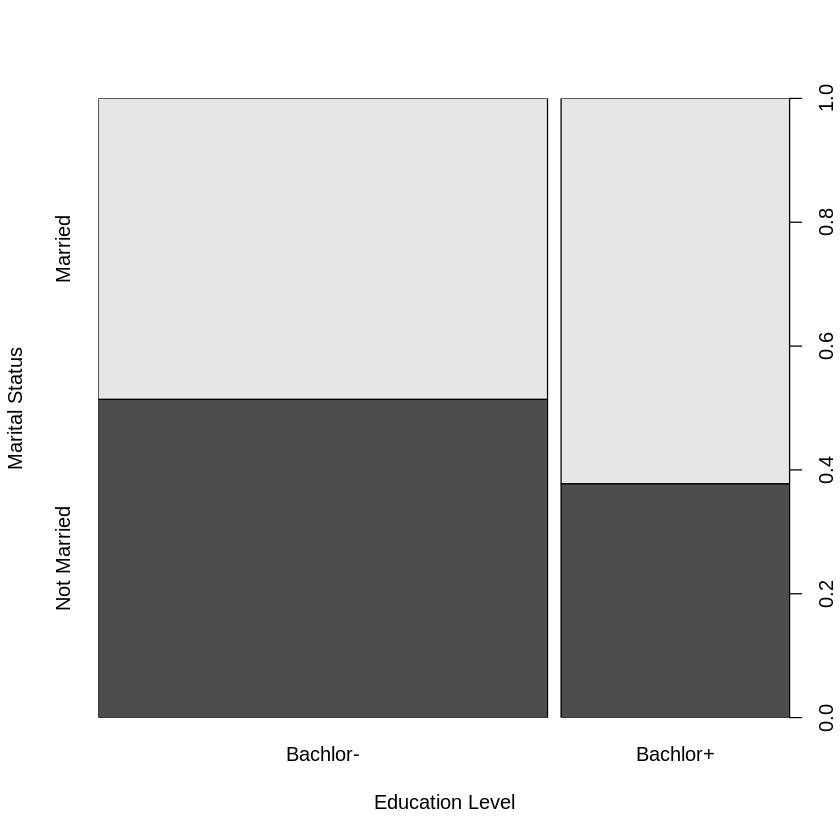

In [126]:
# Plot using the grouped education level and martial statuses
# Indicates Married group has a higher education level than Not Married group.
plot(DMDMARTZ_grouped ~ DMDEDUC2_grouped , data =demo_data_clean,ylab = "Marital Status" ,xlab = "Education Level" )

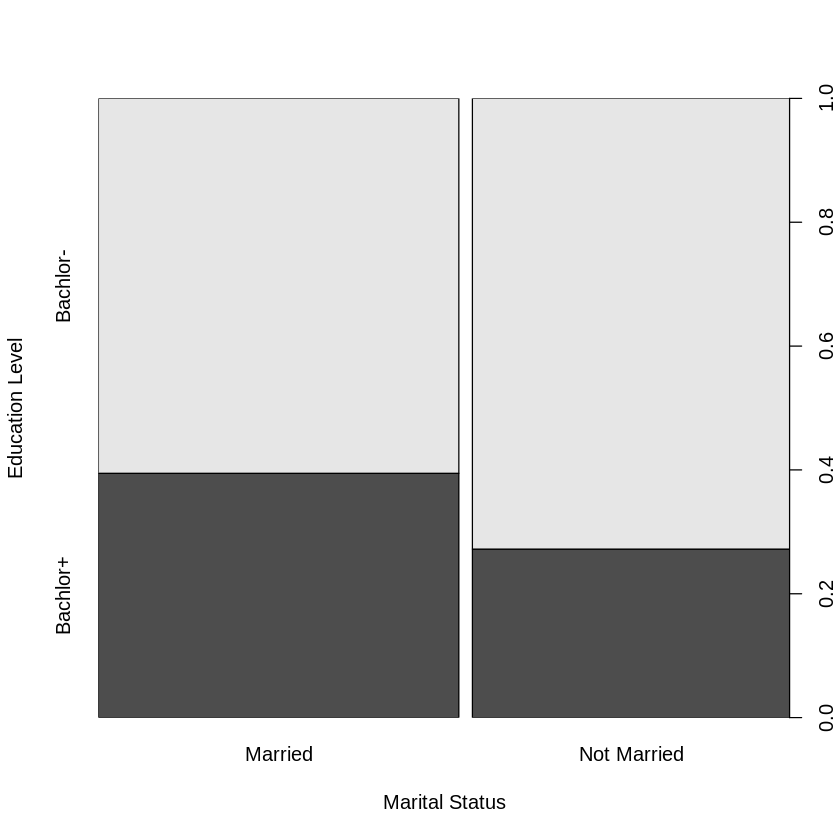

In [127]:
# Plot using the grouped marital status, the chart does not show any signficate difference.
# Indicates the group with the higher education level are Married.
plot(DMDEDUC2_grouped ~ DMDMARTZ_grouped , data =demo_data_clean,xlab = "Marital Status" ,ylab = "Education Level" )

  - **Question 2**: "Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?"  
     - Variables: `DMDMARTZ` (marital status, recoded) and `PAD680` (sedentary behavior time, cleaned).

## DEMO_L.xpt [DMDMARTZ] & PAQ_L.xpt [PAD680]
### Minutes sedentary activity
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|0 to 1380	|Range of Values|	8065	|8065|
|7777	|Refused	|6	|8071	|
|9999	|Don't know	|67	|8138|
|.	|Missing	|15	|8153|

In [128]:
# Merge the paq_data_cleaned dataframes on the 'SEQN' column with demo_clean_data
paq_merged_data <- merge(demo_data_clean, paq_data_clean, by = "SEQN")
#colnames(paq_merged_data)
# Display the first few rows of the merged dataframe
#paq_merged_data[, c("SEQN","DMDMARTZ", "PAD680")]

In [129]:
# Create two dataframe of married vs not married to prepare for T-test
paq_married <- subset(paq_merged_data,DMDMARTZ_grouped == "Married" )
paq_notMarried <- subset(paq_merged_data,DMDMARTZ_grouped == "Not Married")


In [130]:
# T-Test married vs not married using the PAD680 column
paq_t_test_result <- t.test(paq_married$PAD680, paq_notMarried$PAD680, var.equal = FALSE)
paq_t_test_result
# Based on the results there is difference in the mean sedimentary behavior time between married and not married people.
# Married 353.2108 minutes vs Not Married 371.93 minutes.
# The not married group is more likely to have sedimentary behavior


	Welch Two Sample t-test

data:  paq_married$PAD680 and paq_notMarried$PAD680
t = -3.8609, df = 7385.2, p-value = 0.0001139
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -28.229667  -9.216944
sample estimates:
mean of x mean of y 
 353.2108  371.9341 


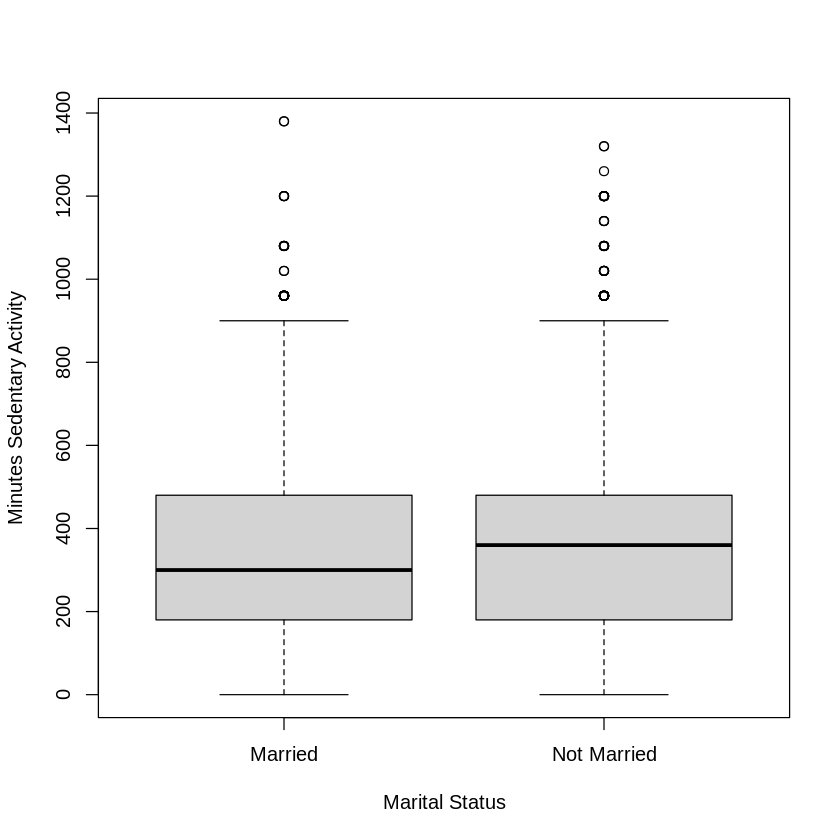

In [131]:
# Plot using the grouped marital status
plot(PAD680 ~ DMDMARTZ_grouped , data =paq_merged_data,xlab = "Marital Status",ylab = "Minutes Sedentary Activity"   )

  - **Question 3**: "How do age and marital status affect systolic blood pressure?"  
     - Variables: `RIDAGEYR` (age), `DMDMARTZ` (marital status, recoded), and `BPXOSY3` (systolic blood pressure).

In [132]:
# Omitting 'Missing' age
demo_clean_with_age <- subset(demo_data_clean, !is.na (RIDAGEYR))
# Merge the bpxo_data_clean dataframes on the 'SEQN' column with demo_clean_with_age
bpxo_merged_data <- merge(demo_clean_with_age, bpxo_data_clean, by = "SEQN")
# Since this question compares 2 categories (ages and marital status) with systolic pressure linear regression method was selected for this analysis

In [133]:
# Create two dataframe of married vs not married to prepare for T-test
bpxo_married <- subset(bpxo_merged_data,DMDMARTZ_grouped == "Married" )
bpxo_notMarried <- subset(bpxo_merged_data,DMDMARTZ_grouped == "Not Married")

In [135]:
# Perform linear regression
regression_model <- lm(BPXOSY3 ~ RIDAGEYR + DMDMARTZ_grouped, data = bpxo_merged_data)

# Display the summary of the regression model
summary(regression_model)

# The result indicate as Age [RIDAGEYR] increases, systolic pressure also increase with low p-value 2e-16 close to zero with high assoication indications.
# Marital  Status [DMDMARTZ] estimate 1.2455 indicates the not married group has a higher systolic pressure, with p-value 0.006645 is less than 0.0.5 with high association indicating the results as strong correlation between martial status and systolic blood pressure


Call:
lm(formula = BPXOSY3 ~ RIDAGEYR + DMDMARTZ_grouped, data = bpxo_merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.467 -11.110  -1.444   9.250 105.048 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 110.8762     2.4272  45.681  < 2e-16 ***
RIDAGEYR21                   -0.3722     3.2031  -0.116 0.907489    
RIDAGEYR22                   -1.2408     3.3285  -0.373 0.709339    
RIDAGEYR23                    0.4589     3.2493   0.141 0.887695    
RIDAGEYR24                   -0.2869     3.2874  -0.087 0.930448    
RIDAGEYR25                   -0.1357     3.2279  -0.042 0.966462    
RIDAGEYR26                   -0.4964     3.3020  -0.150 0.880512    
RIDAGEYR27                    0.6553     3.1759   0.206 0.836540    
RIDAGEYR28                    2.2530     3.2285   0.698 0.485297    
RIDAGEYR29                    0.7444     3.0736   0.242 0.808634    
RIDAGEYR30                    1.1522     3.0298 

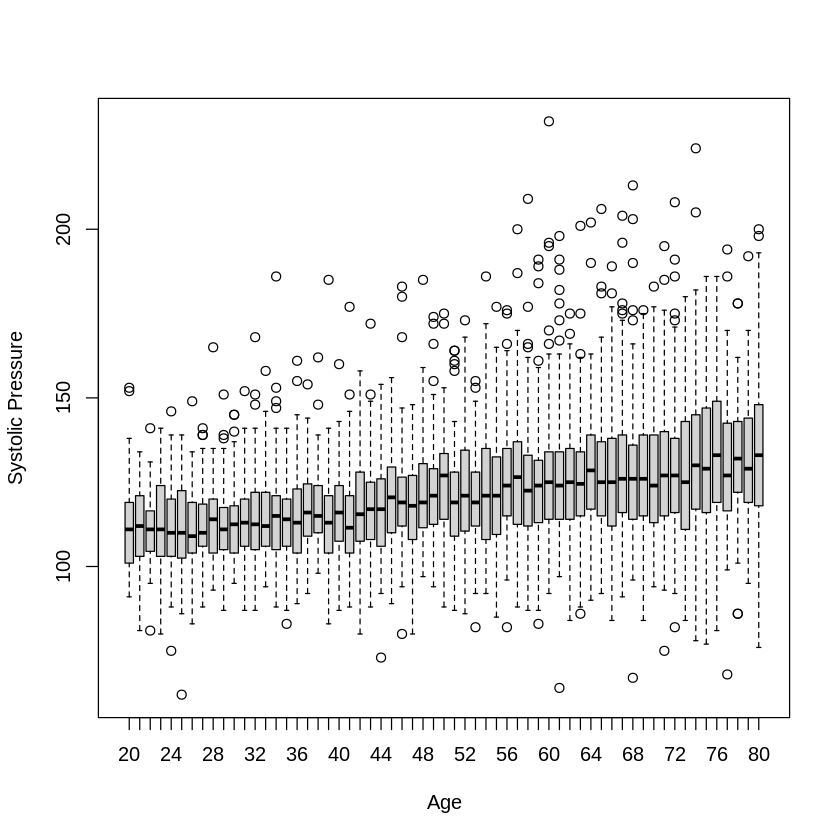

In [134]:
# plot difference base on age on systolic pressure
bpxo_merged_data$RIDAGEYR <- as.factor(bpxo_merged_data$RIDAGEYR)

# Plot using the age and systolic readings
plot(BPXOSY3  ~ RIDAGEYR , data =bpxo_merged_data,xlab = "Age",ylab = "Systolic Pressure")

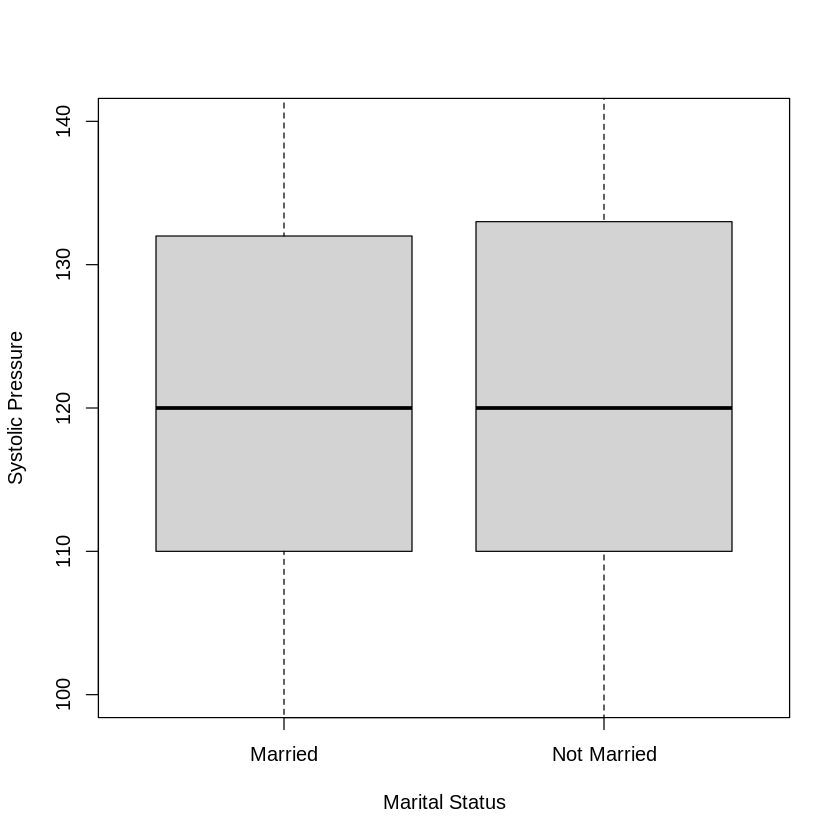

In [136]:
# plot difference base on marital status on systolic pressure
bpxo_merged_data$DMDMARTZ_grouped <- as.factor(bpxo_merged_data$DMDMARTZ_grouped)

# Plot using marital status and systolic readings
# Adjust y-axis limits to magnify the difference
plot(BPXOSY3  ~ DMDMARTZ_grouped , data =bpxo_merged_data,xlab = "Marital Status",ylab = "Systolic Pressure", ylim = c(100, 140))

In [137]:
# Function to calculate mean, standard deviation, and standard error
summary_stats <- function(x) {
  mean_val <- mean(x, na.rm = TRUE)
  sd_val <- sd(x, na.rm = TRUE)
  n <- sum(!is.na(x))
  se_val <- sd_val / sqrt(n)
  return(c(mean = mean_val, sd = sd_val, se = se_val, n = n))
}

# Calculate summary statistics for systolic blood pressure by marital status
summary_by_marital_status = aggregate(BPXOSY3 ~ DMDMARTZ_grouped, data = bpxo_merged_data, FUN = summary_stats)

# Calculate the 95% confidence interval for the mean
# CI = mean +/- t * SE (using a t-distribution critical value, approx 1.96 for large n)
summary_by_marital_status$lower_ci = summary_by_marital_status$BPXOSY3[, "mean"] - 1.96 * summary_by_marital_status$BPXOSY3[, "se"]
summary_by_marital_status$upper_ci = summary_by_marital_status$BPXOSY3[, "mean"] + 1.96 * summary_by_marital_status$BPXOSY3[, "se"]

# Display the summary statistics with confidence intervals
# These results indicate while there is a significate statistical difference, the systolic blood pressure difference of (122.61mmHg -122.87mmHg).26mmHg is not a huge difference between the two martial status groups.
print(summary_by_marital_status)

  DMDMARTZ_grouped BPXOSY3.mean   BPXOSY3.sd   BPXOSY3.se    BPXOSY3.n lower_ci
1          Married  122.6098556   18.0448425    0.3196909 3186.0000000 121.9833
2      Not Married  122.8705172   18.7728772    0.3647454 2649.0000000 122.1556
  upper_ci
1 123.2364
2 123.5854


In [138]:
# T-Test married vs not married using the RIDAGEYR column
bpxo_merged_data <- t.test(bpxo_married$RIDAGEYR , bpxo_notMarried$RIDAGEYR , var.equal = FALSE)
bpxo_merged_data
# The T-Test results indicate married group has higher systolic pressure based on the age of married being higher than not married group (55.13622 vs 52.38241).


	Welch Two Sample t-test

data:  bpxo_married$RIDAGEYR and bpxo_notMarried$RIDAGEYR
t = 6.0726, df = 5322.4, p-value = 1.346e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.864805 3.642820
sample estimates:
mean of x mean of y 
 55.13622  52.38241 


 - **Question 4**: "Is there a correlation between self-reported weight and minutes of sedentary behavior?"  
     - Variables: `WHD020` (self-reported weight, cleaned) and `PAD680` (sedentary behavior time, cleaned).

In [140]:
# Merge the whq_data_clean dataframes on the 'SEQN' column with paq_data_clean in SEQN
whq_merged_data <- merge(whq_data_clean, paq_data_clean, by = "SEQN")

In [141]:
# Perform linear regression
regression_model <- lm(PAD680 ~ WHD020, data = whq_merged_data)

# Display the summary of the regression model
summary(regression_model)

# The results indicate a weak correlation between reported weight and physical activity R-squred value of 0.0242


Call:
lm(formula = PAD680 ~ WHD020, data = whq_merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-484.70 -154.33  -38.26  132.10 1049.06 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 239.32409    9.00957   26.56   <2e-16 ***
WHD020        0.67861    0.04819   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.9 on 7952 degrees of freedom
Multiple R-squared:  0.02433,	Adjusted R-squared:  0.0242 
F-statistic: 198.3 on 1 and 7952 DF,  p-value: < 2.2e-16


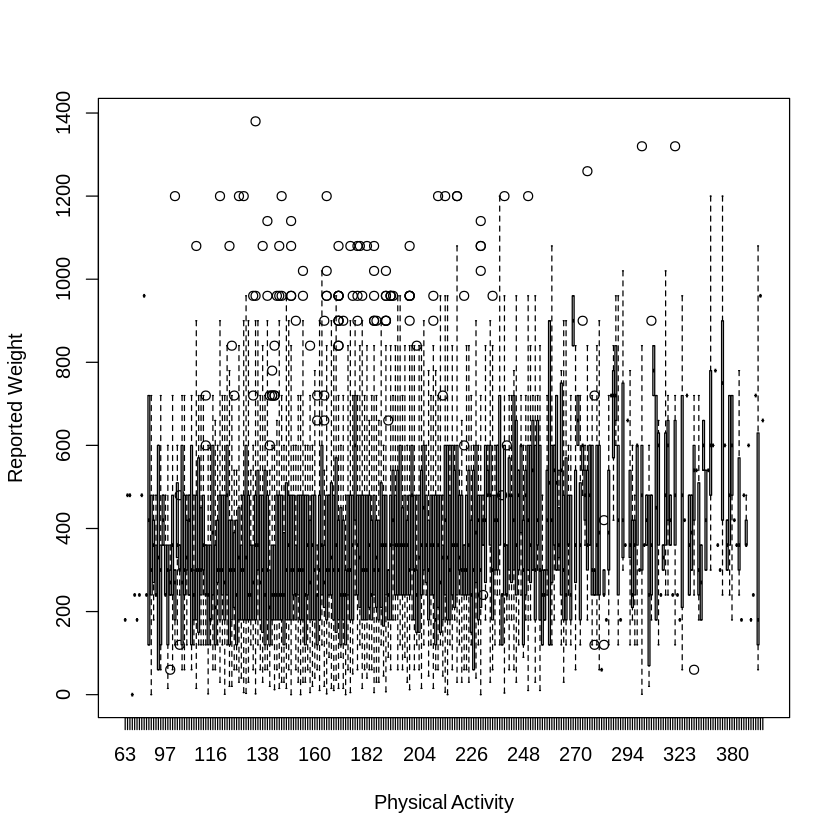

In [143]:
# plot difference physical activity and patient reported weight
whq_merged_data$WHD020 <- as.factor(whq_merged_data$WHD020)

# Plot using patient reported weight and physical activity
# Adjust y-axis limits to magnify the difference
plot(PAD680  ~ WHD020 , data =whq_merged_data,xlab = "Physical Activity",ylab = "Reported Weight")

  - **Question 5 (Creative Analysis)**: Develop your own unique question using at least one of the variables listed above. Ensure that your question can be answered using one of the following tests: chi-square, t-test, ANOVA, or correlation. Clearly state your question, explain why you chose the test, and document your findings.